In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

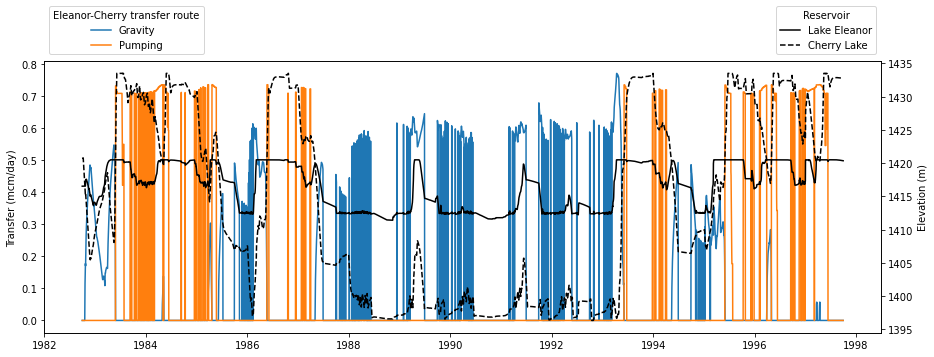

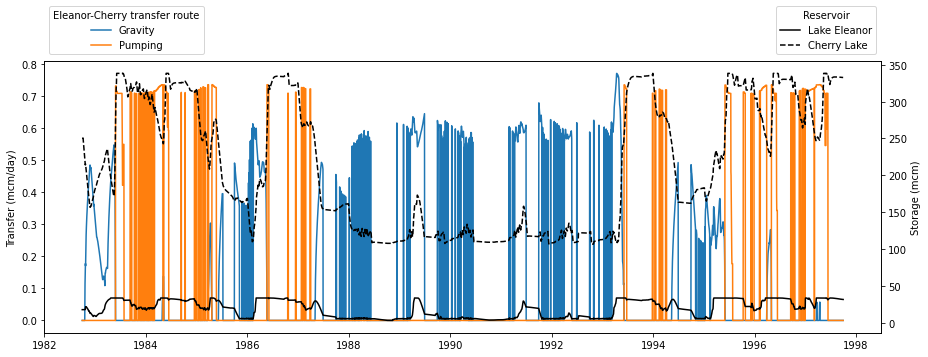

In [3]:
def load_df(filename, include=None):
    filepath = '../results/development/tuolumne/historical/Livneh/{}.csv'.format(filename)
    df = pd.read_csv(filepath, parse_dates=True, index_col=0, header=0)
    if include:
        df = df[include]
#     df.columns.name = 'facility'
#     df = df.stack().rename('value').reset_index()
    return df

Q = load_df('Link_Flow_mcm', include=['Eleanor-Cherry Gravity', 'Eleanor-Cherry Pumping'])
Q.columns = ['Gravity', 'Pumping']
S = load_df('Reservoir_Storage_mcm', include=['Lake Eleanor', 'Cherry Lake'])
E = load_df('Reservoir_Elevation_m', include=['Lake Eleanor', 'Cherry Lake'])

def create_fig(reservoir_data, reservoir_label):

    fig, ax1 = plt.subplots(figsize=(15, 5))

    # sns.barplot(data=Q, x='Date', y='value', hue='facility')

    cols = Q.columns
    # colors = ['blue', 'red']
    for i, col in enumerate(Q):
        ax1.plot(Q.index, Q[col], label=col)

    ax1.set_ylabel('Transfer (mcm/day)')

    ax2 = ax1.twinx()

    styles = ['solid', 'dashed']
    # for i, col in enumerate(E):
    #     ax2.plot(E.index, E[col], label=col, color='black', linestyle=styles[i])
    # ax2.set_ylabel('Storage (mcm)')

    R = reservoir_data
    for i, col in enumerate(R):
        ax2.plot(R.index, R[col], label=col, color='black', linestyle=styles[i])   
    ax2.set_ylabel(reservoir_label)

    # add legends last
    ax1.legend(title='Eleanor-Cherry transfer route', loc='upper left', bbox_to_anchor=(0, 1.22))
    ax2.legend(title='Reservoir', loc='upper right', bbox_to_anchor=(1, 1.22))

create_fig(E, 'Elevation (m)')
create_fig(S, 'Storage (mcm)')
    
plt.show()